This project explores the "Red Wine Quality" dataset by UCI Machine Learning on Kaggle (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv("wine_quality.csv")

In [3]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  good  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0  
3      9.8        6     0  
4      9.4        5     0

We want to run a regression analysis for the "quality" variable first.

In [4]:
wine_reg = wine.drop("good", axis = 1)

In [5]:
wine_reg.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

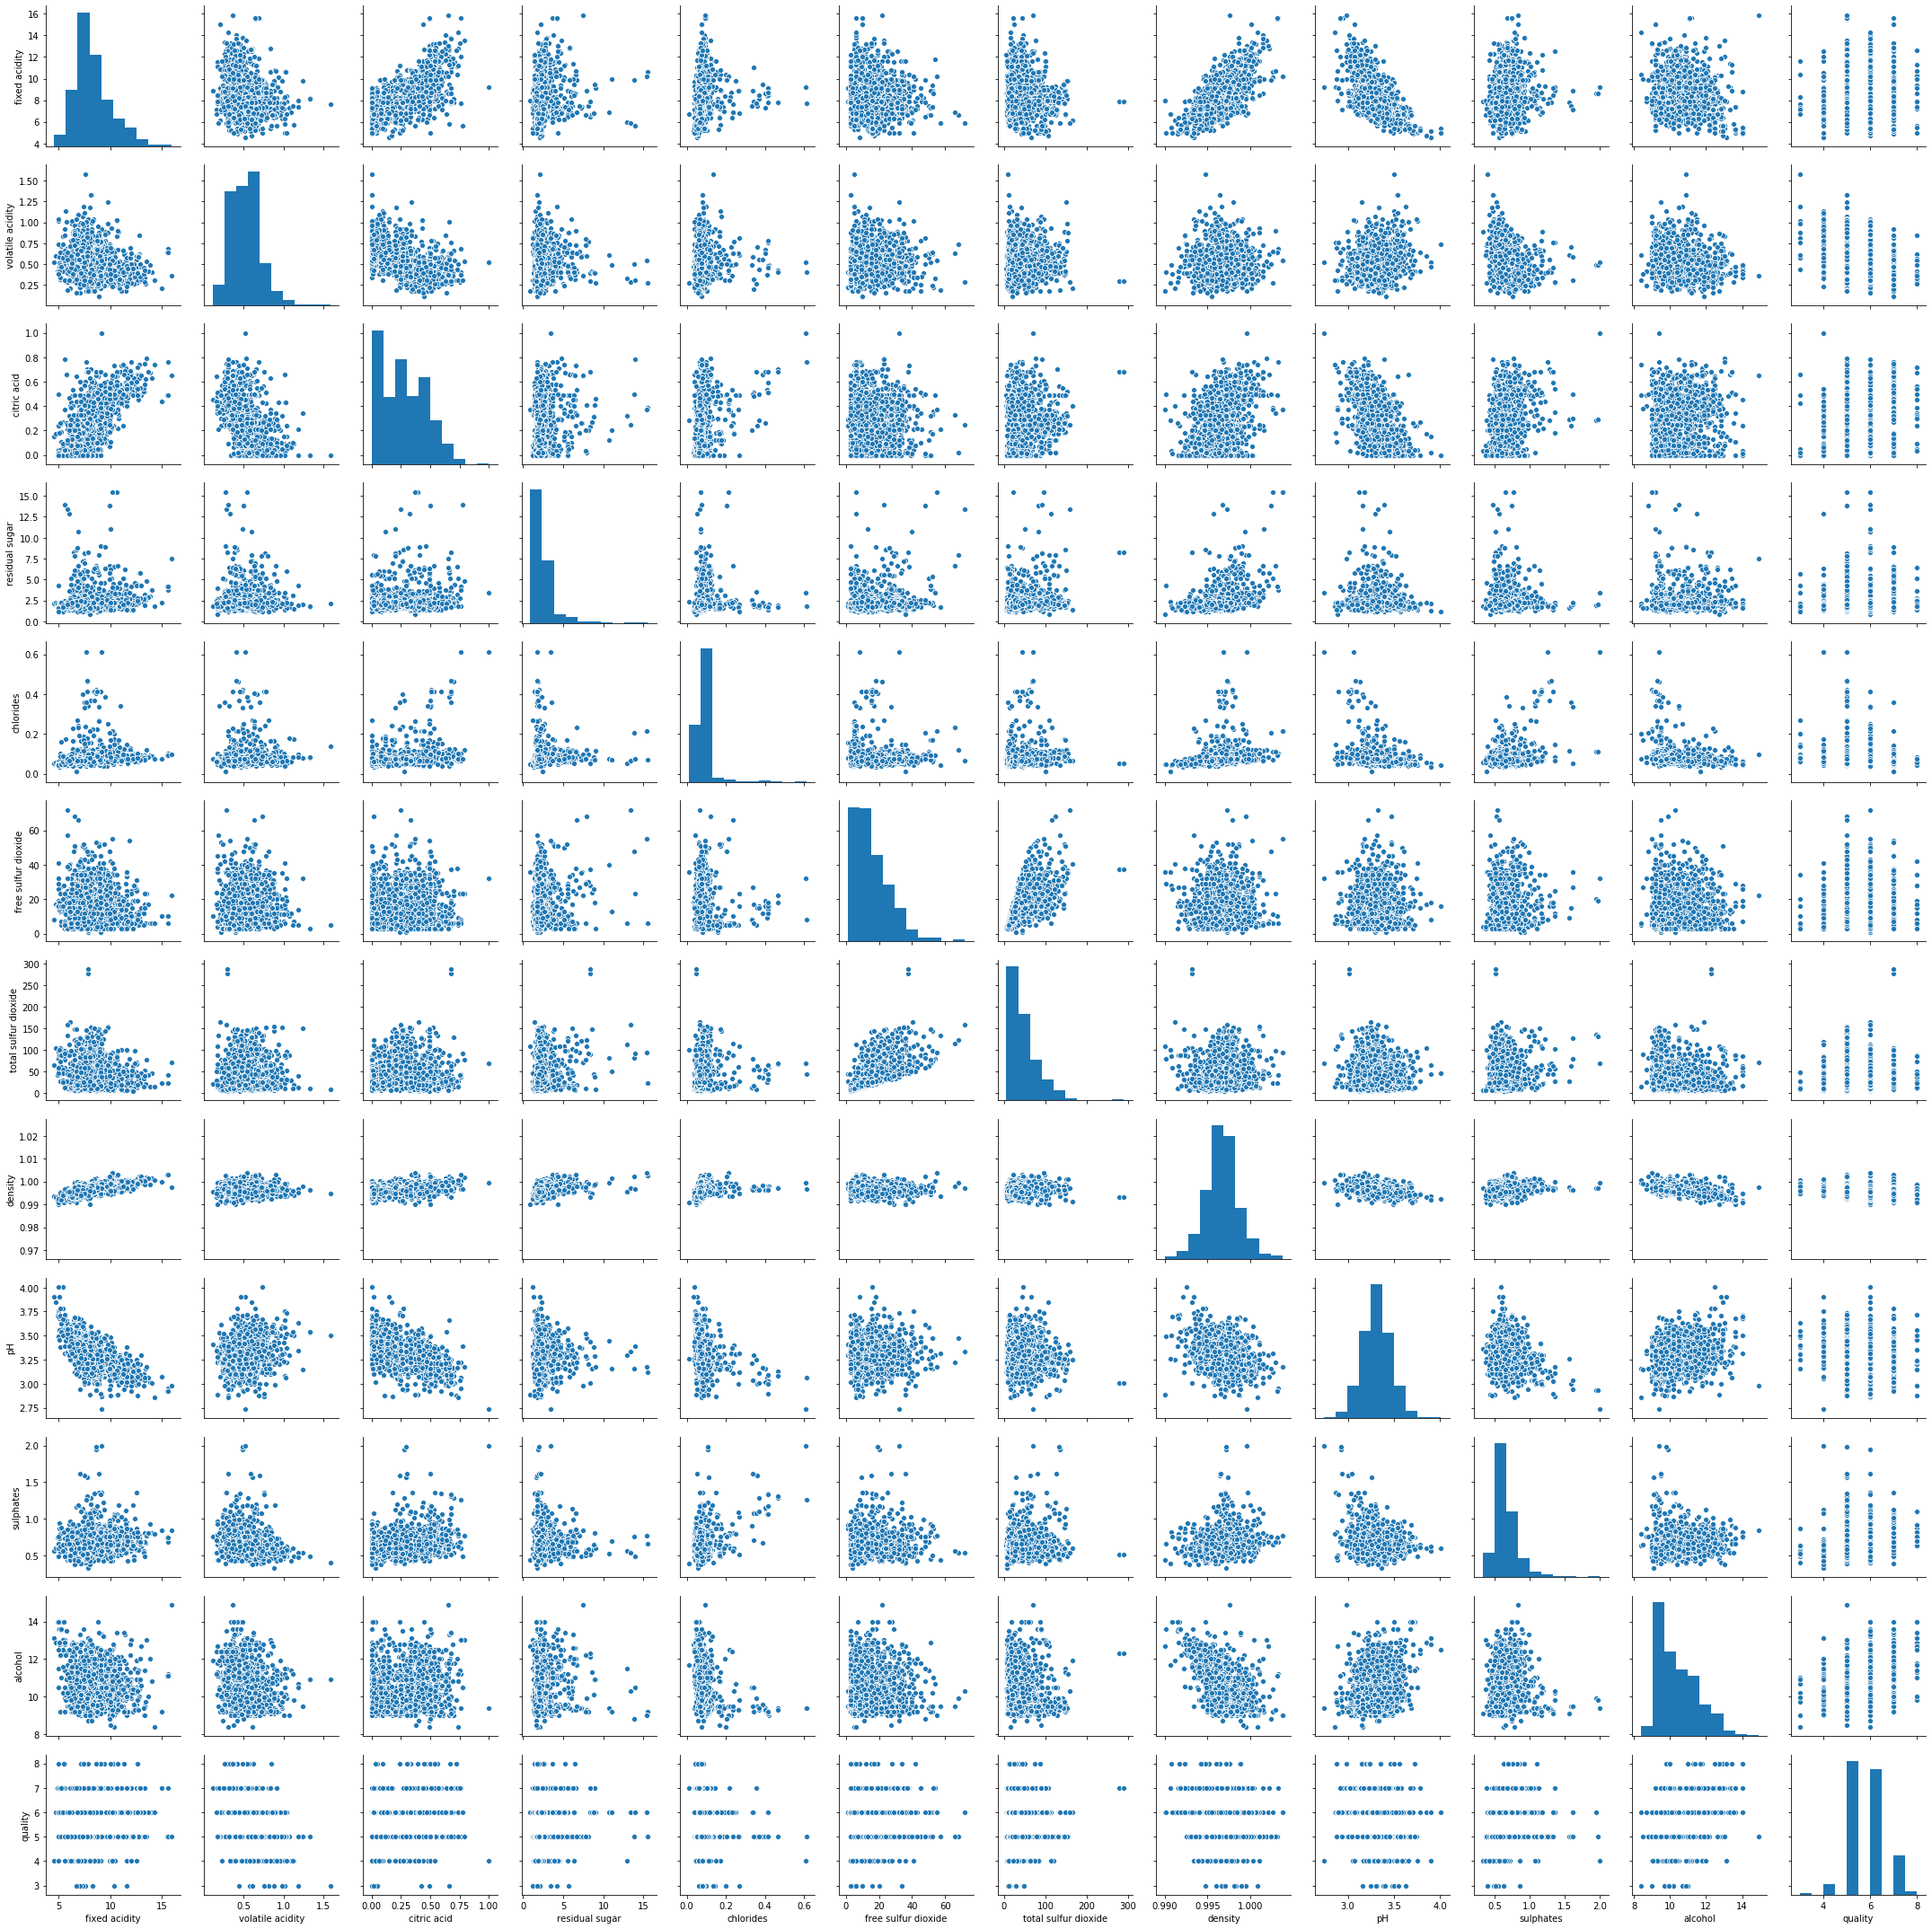

In [6]:
sns.pairplot(data = wine_reg)

In [8]:
wine_reg['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

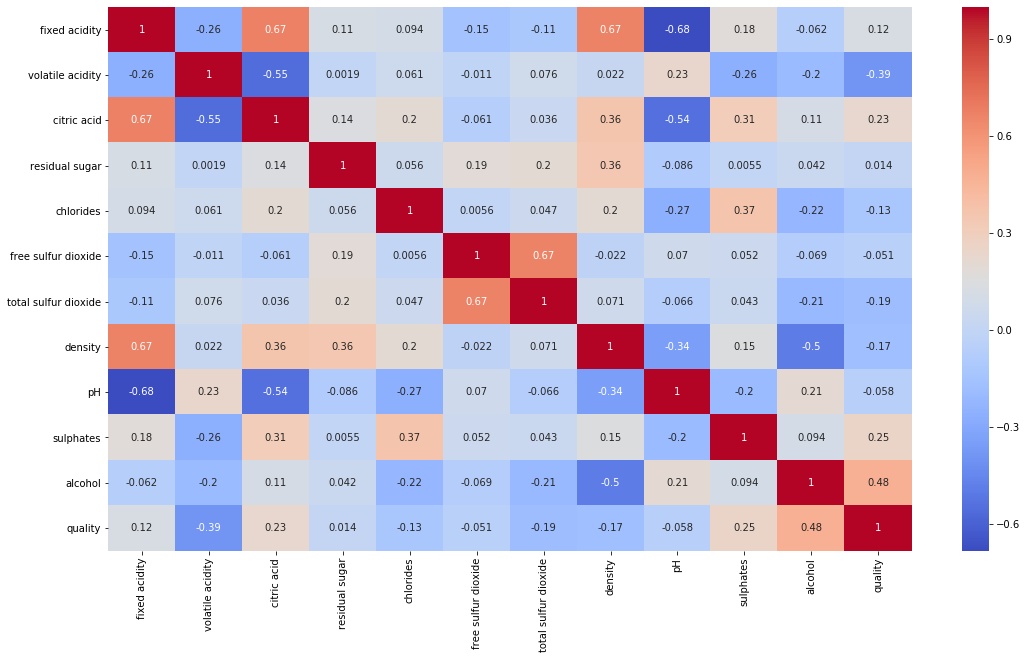

In [13]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(wine_reg.corr(), cmap = "coolwarm", annot = True, ax = ax)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(wine_reg.drop("quality", axis = 1), 
                                                    wine_reg['quality'], 
                                                    test_size=0.3, 
                                                    random_state = 69)

In [16]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print(lin.intercept_)
coeff_df = pd.DataFrame(lin.coef_,wine_reg.drop("quality", axis = 1).columns,columns=['Coefficient'])
coeff_df

20.253730726695558


Coefficient
fixed acidity            0.011085
volatile acidity        -1.039349
citric acid             -0.212774
residual sugar           0.016122
chlorides               -1.676580
free sulfur dioxide      0.003939
total sulfur dioxide    -0.003556
density                -15.679150
pH                      -0.502898
sulphates                0.937257
alcohol                  0.265334

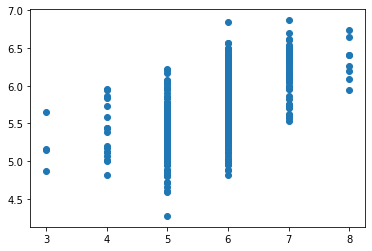

In [21]:
predictions = lin.predict(X_test)
plt.scatter(y_test,predictions)

In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5271621312826553
MSE: 0.4624392804185819
RMSE: 0.6800288820473598


In [19]:
import statsmodels.api as sm
from scipy import stats

In [24]:
X = wine_reg.drop("quality", axis = 1)
y = wine_reg["quality"]

In [25]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.79e-145
Time:                        23:14:19   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

C:\Users\Mick4\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
X_reduced = X2.drop(["fixed acidity", "citric acid", "residual sugar", "density"], axis = 1)

In [27]:
est = sm.OLS(y, X_reduced)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          5.32e-149
Time:                        23:16:09   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301 

Now we add a new, categorical variable, "good", that is equal to 0 if quality < 7 and 1 otherwise. We want to build a classification model.

In [28]:
wine_class = wine.drop("quality", axis = 1)

In [29]:
wine_class.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  good  
0      9.4     0  
1      9.8     0  
2      9.8     0  
3      9.8     0  
4      9.4     0

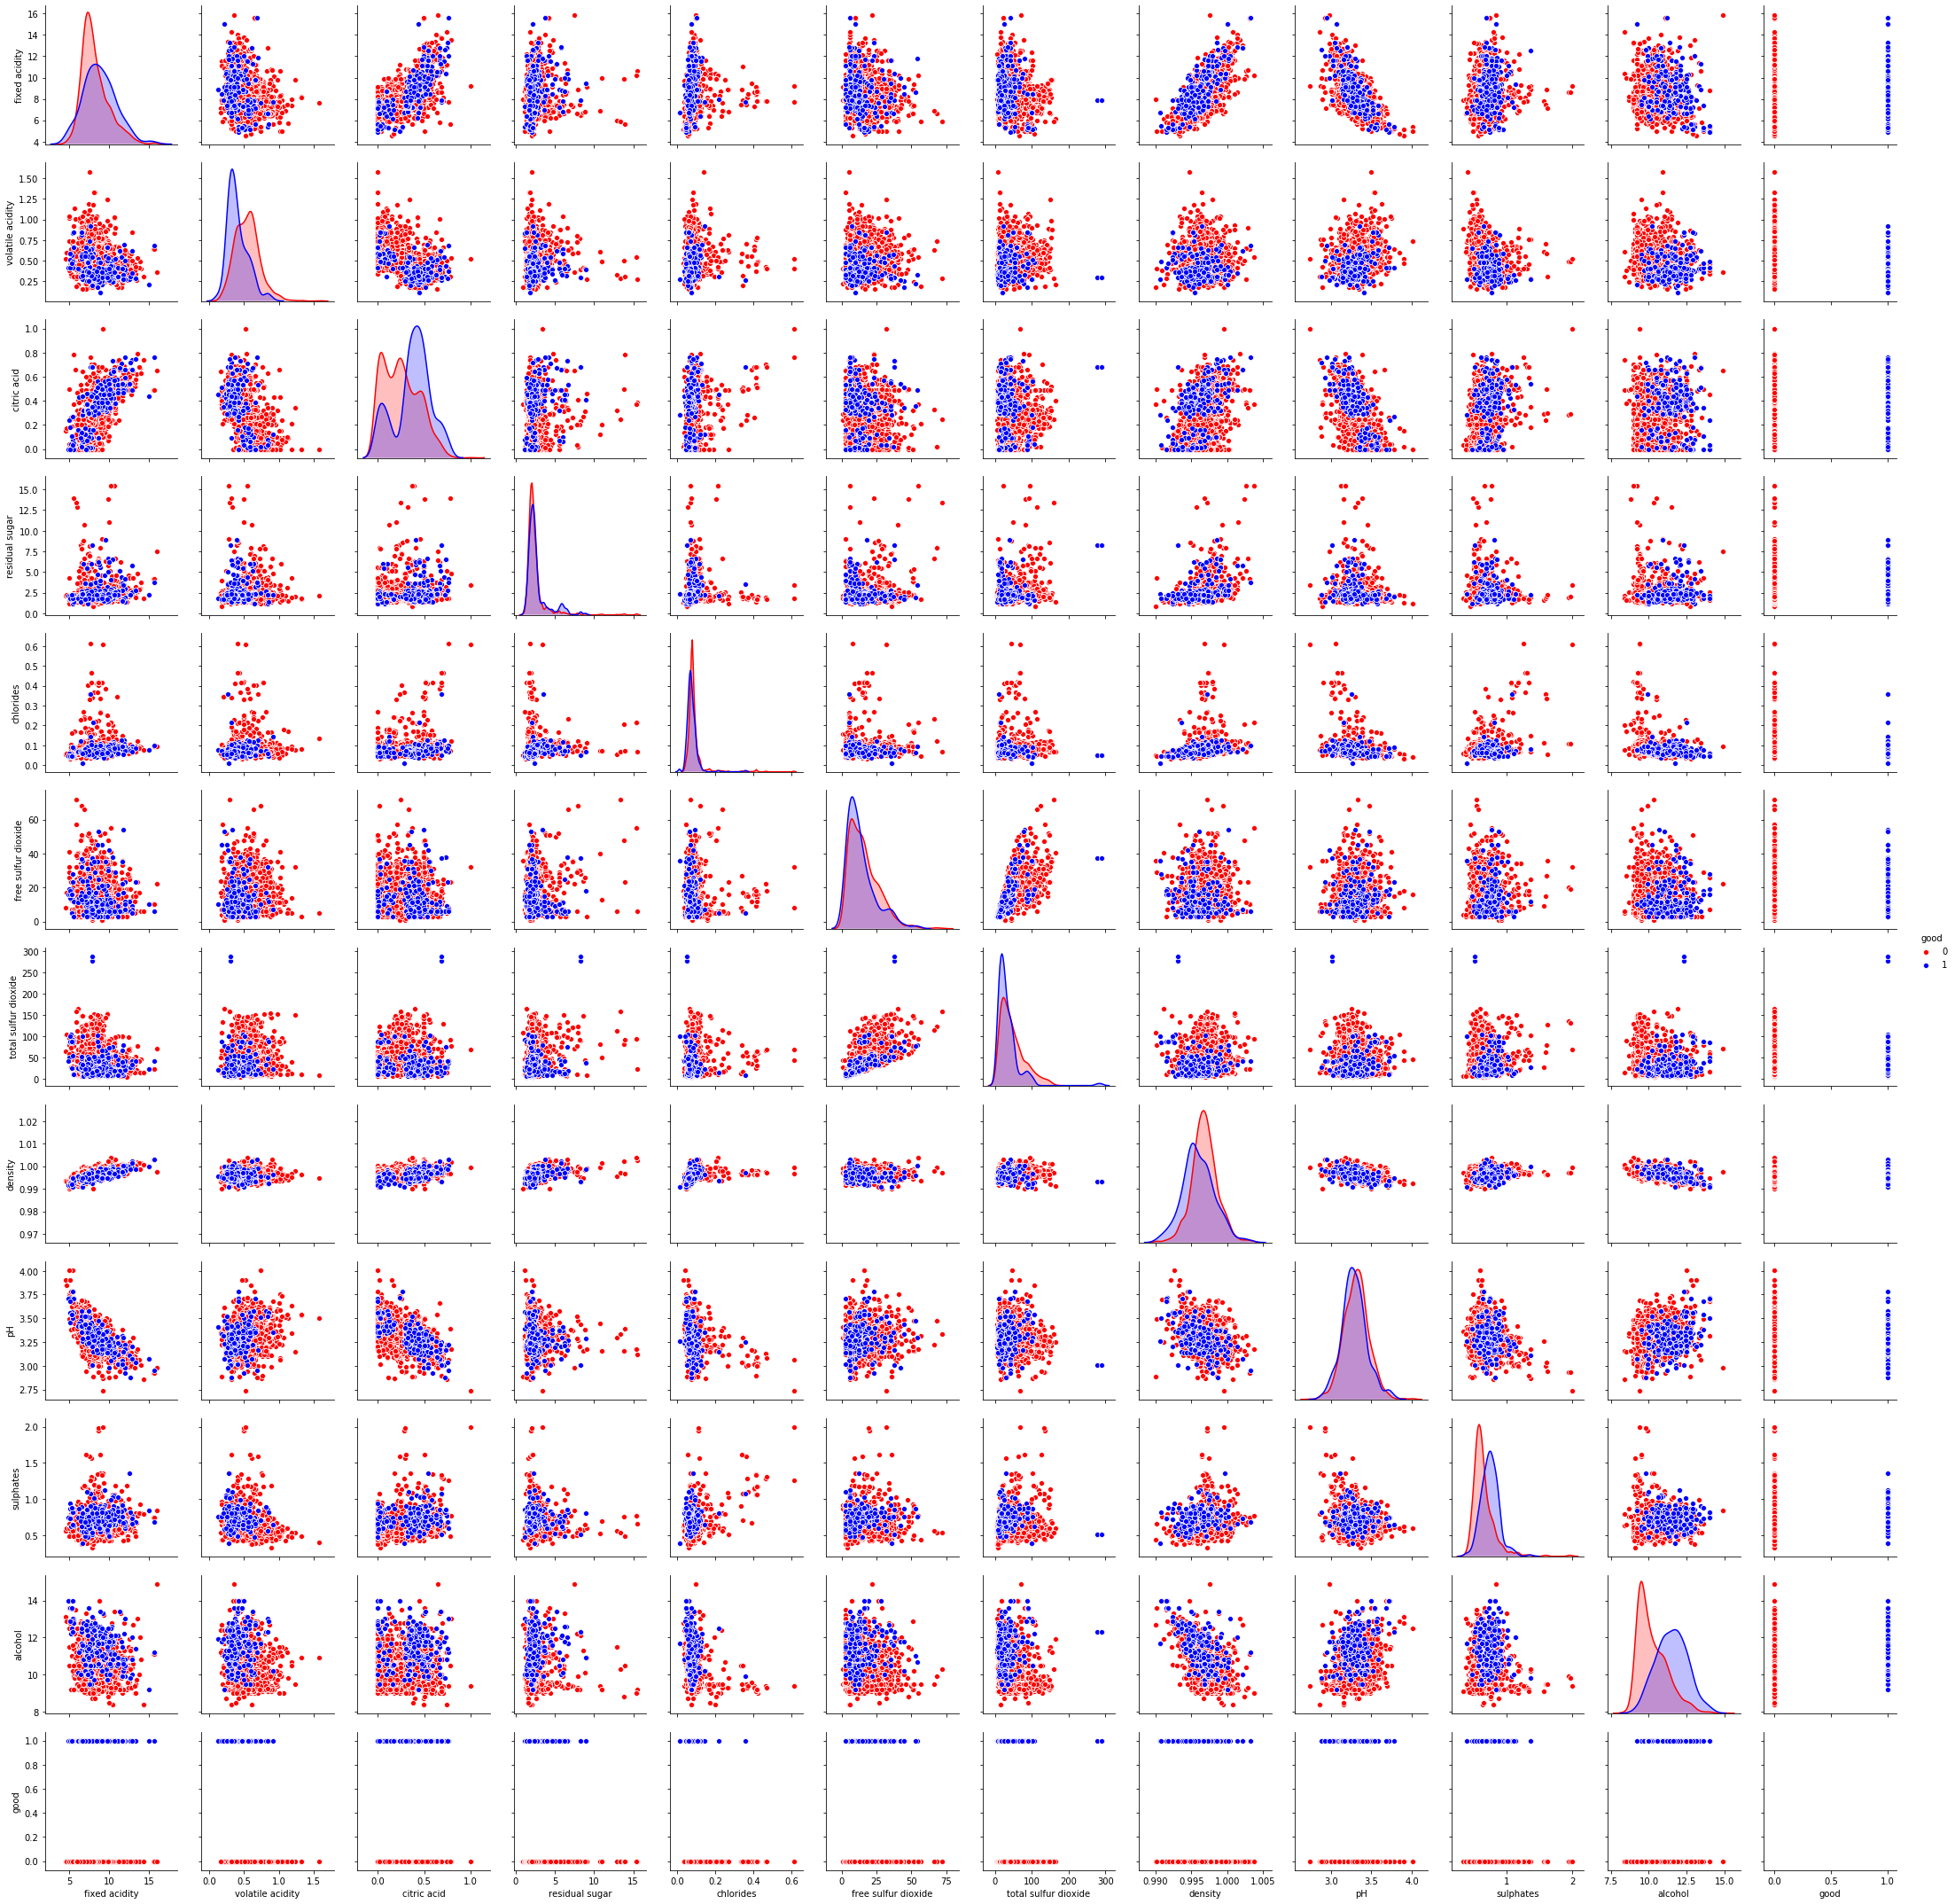

In [34]:
sns.pairplot(data = wine_class, hue = "good", palette = {0: "Red", 1: "Blue"})

In [35]:
wine_class["good"].value_counts()

0    1382
1     217
Name: good, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(wine_class.drop("good", axis = 1), 
                                                    wine_class['good'], 
                                                    test_size=0.3, 
                                                    random_state = 69)

In [39]:
#Upsample zeroes
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis = 1)
trues = X[X["good"] == 1]
falses = X[X["good"] == 0]
false_upsampled = resample(falses,replace = True, n_samples = len(trues),random_state=420)
upsampled = pd.concat([trues,false_upsampled])
y_train = upsampled["good"]
X_train = upsampled.drop("good",axis=1)

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
logit = LogisticRegression(solver='liblinear').fit(X_train, y_train)
logit_pred = logit.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(confusion_matrix(y_test, logit_pred))
print(classification_report(y_test, logit_pred))

[[321  81]
 [ 14  64]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       402
           1       0.44      0.82      0.57        78

   micro avg       0.80      0.80      0.80       480
   macro avg       0.70      0.81      0.72       480
weighted avg       0.87      0.80      0.82       480



In [46]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))

[[281 121]
 [ 20  58]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       402
           1       0.32      0.74      0.45        78

   micro avg       0.71      0.71      0.71       480
   macro avg       0.63      0.72      0.63       480
weighted avg       0.83      0.71      0.74       480



In [47]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[325  77]
 [  6  72]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       402
           1       0.48      0.92      0.63        78

   micro avg       0.83      0.83      0.83       480
   macro avg       0.73      0.87      0.76       480
weighted avg       0.90      0.83      0.85       480



In [68]:
#Random forest with 60 estimators
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 60)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[397   5]
 [ 47  31]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       402
           1       0.86      0.40      0.54        78

   micro avg       0.89      0.89      0.89       480
   macro avg       0.88      0.69      0.74       480
weighted avg       0.89      0.89      0.87       480



Whoa! A vastly different answer. Let's test for different numbers of estimators.

In [71]:
error_rate = []

# Will take some time. Uncomment the print(i) statement to get an indication of the progress of this loop.
for i in range(20,300):
    #print(i)
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    error_rate.append(np.mean(rfc_pred != y_test)) #average of the error rate (i.e. prediction not equal to true value)

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289


Text(0, 0.5, 'Error rate')

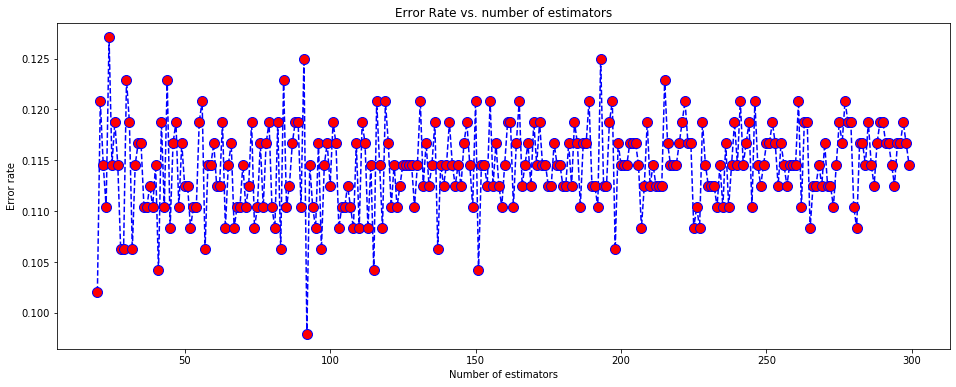

In [96]:
#Plot of the error rates
plt.figure(figsize=(16,6))
plt.plot(range(20,300),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Error rate')

In [78]:
error_rate.index(min(error_rate))

72

In [79]:
#Hence the minimum loss occurs when the number of estimators is equal to 92.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 92)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[396   6]
 [ 48  30]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       402
           1       0.83      0.38      0.53        78

   micro avg       0.89      0.89      0.89       480
   macro avg       0.86      0.68      0.73       480
weighted avg       0.88      0.89      0.87       480



In [49]:
#Support vector machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[318  84]
 [ 21  57]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       402
           1       0.40      0.73      0.52        78

   micro avg       0.78      0.78      0.78       480
   macro avg       0.67      0.76      0.69       480
weighted avg       0.85      0.78      0.80       480



C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [50]:
#svm hyperparameter tuning
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5957446808510638, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5760869565217391, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6195652173913043, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5851063829787234, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6086956521739131, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7608695652173914, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[CV]  C=1000, gamma=1, kernel=rbf, score=0.6521739130434783, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6847826086956522, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6702127659574468, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6847826086956522, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7391304347826086, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.6276595744680851, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.6413043478260869, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [51]:
grid_pred = grid.predict(X_test)
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

[[317  85]
 [ 14  64]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       402
           1       0.43      0.82      0.56        78

   micro avg       0.79      0.79      0.79       480
   macro avg       0.69      0.80      0.71       480
weighted avg       0.87      0.79      0.82       480



In [52]:
#XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)

C:\Users\Mick4\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Mick4\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [53]:
#XGBoost predictions
preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
print(confusion_matrix(y_test,best_preds))
print(classification_report(y_test,best_preds))

[[303  99]
 [ 15  63]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       402
           1       0.39      0.81      0.53        78

   micro avg       0.76      0.76      0.76       480
   macro avg       0.67      0.78      0.68       480
weighted avg       0.86      0.76      0.79       480



So it seems that there are a lot of "bad" wines being incorrectly classified as good ones, resulting in a very low "1" precision score across all models. This suggests that either there are many wines that have very desirable metrics but are underrated, and/or that some of the "good" wines are overrated.

In [54]:
#KNN Model

In [55]:
#Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_class.drop("good",axis=1))
scaled_features = scaler.transform(wine_class.drop("good",axis=1))

In [56]:
scaled_wine = pd.DataFrame(scaled_features,columns=wine_class.columns[:-1])
scaled_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

In [57]:
X_train, X_test, y_train, y_test = train_test_split(scaled_wine, 
                                                    wine_class['good'], test_size=0.3, 
                                                    random_state=69)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #average of the error rate (i.e. prediction not equal to true value)

Text(0, 0.5, 'Error Rate')

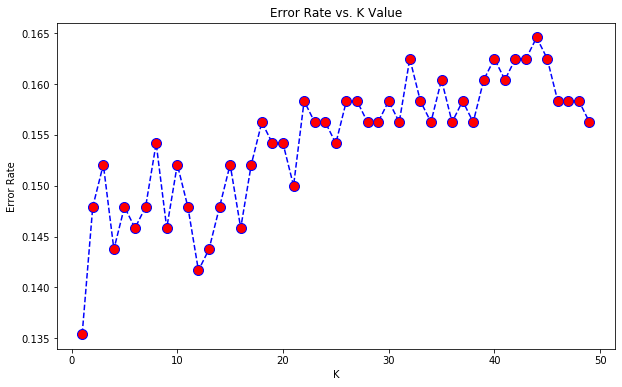

In [60]:
#Plot of the error rates
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Seems like we should use either 1 or 12 as the value of k.

In [62]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[377  25]
 [ 40  38]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       402
           1       0.60      0.49      0.54        78

   micro avg       0.86      0.86      0.86       480
   macro avg       0.75      0.71      0.73       480
weighted avg       0.86      0.86      0.86       480



In [63]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[390  12]
 [ 56  22]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       402
           1       0.65      0.28      0.39        78

   micro avg       0.86      0.86      0.86       480
   macro avg       0.76      0.63      0.66       480
weighted avg       0.84      0.86      0.83       480



So for the k = 1 model, we actually see an improvement in precision for "good" wines at the expense of recall score for said wines.

Let's see if we can find a better way to score these wines.

In [82]:
#Restore the dataset
X = wine_class.drop("good", axis = 1)

In [83]:
from sklearn.cluster import KMeans

In [87]:
kmeans = KMeans(n_clusters=2)

In [88]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1])

In [91]:
wine_reclassed = wine_class.drop("good", axis = 1)
wine_reclassed["new_class"] = kmeans.labels_

In [93]:
wine_reclassed.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  new_class  
0      9.4          1  
1      9.8          0  
2      9.8          1  
3      9.8          1  
4      9.4          1

C:\Users\Mick4\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mick4\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


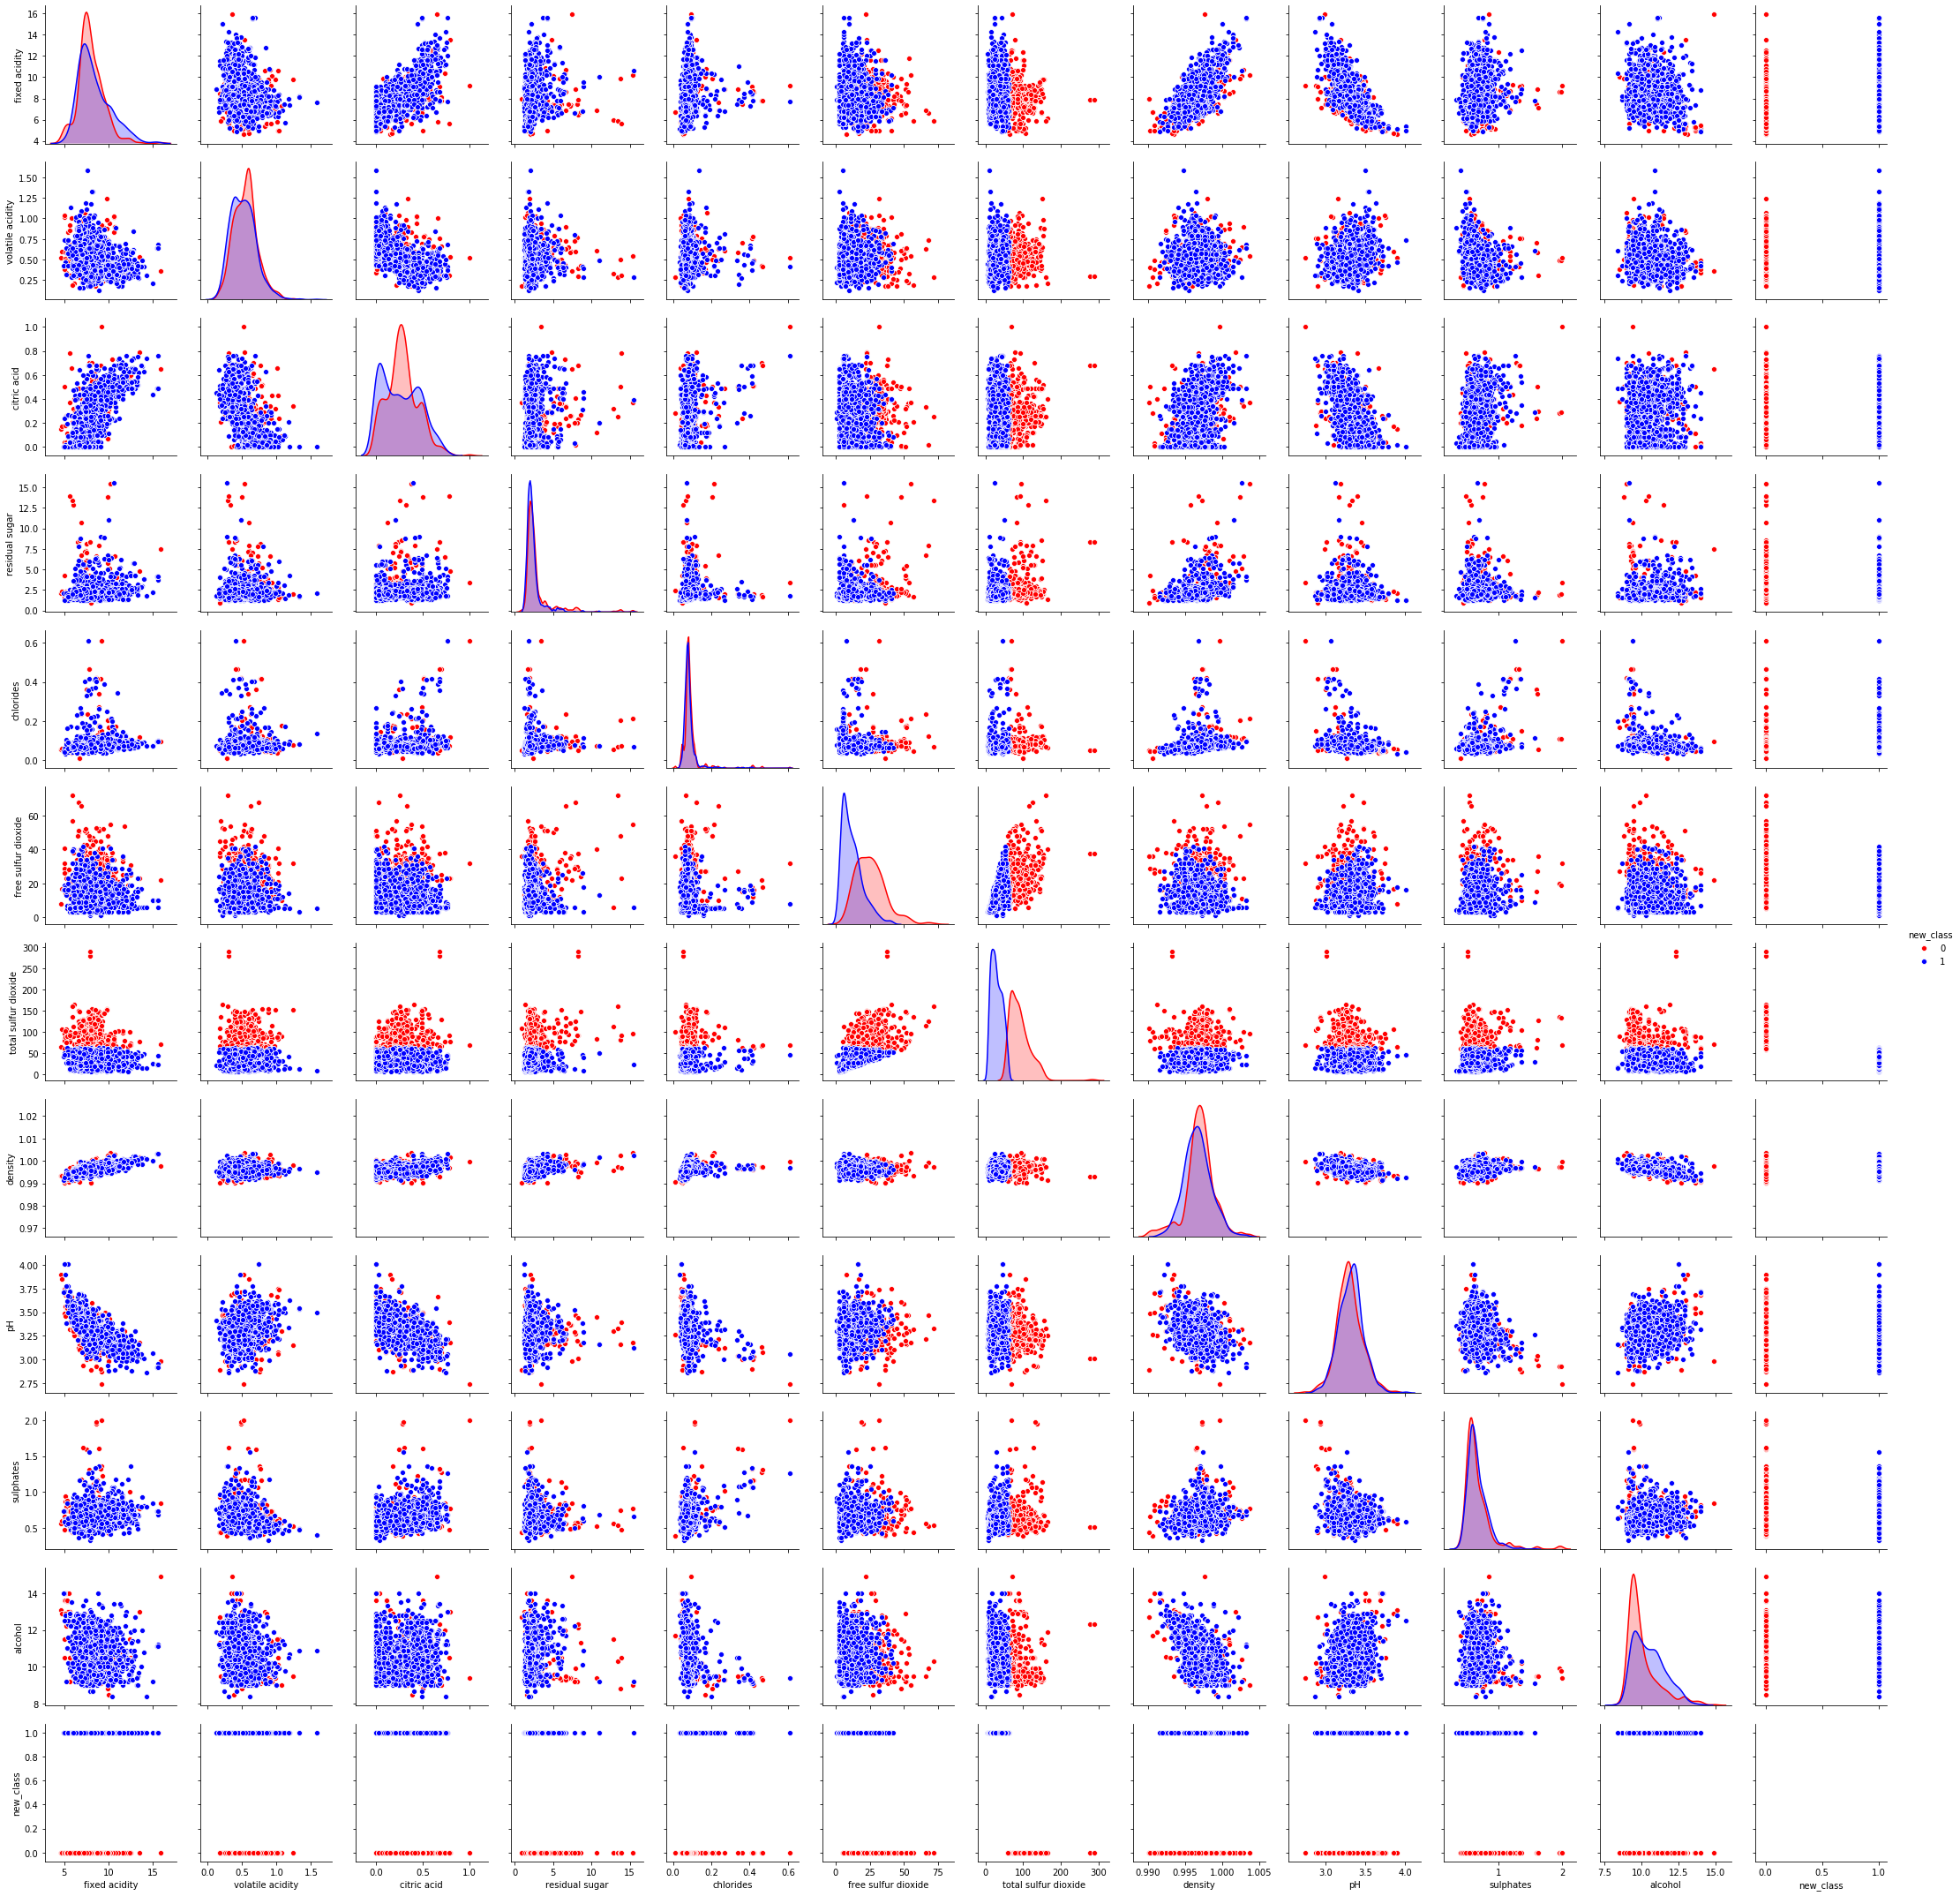

In [94]:
sns.pairplot(data = wine_reclassed, hue = "new_class", palette = {0: "Red", 1: "Blue"})

Interesting. There is a very clean split along total sulfur dioxide. It did seem very splittable in the initial pairplot.

Potential next steps:

1) Compare different types of regression models

2) Account for outliers